# Applying Logistic Regression

In [7]:
#Importing required packages 

import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
mpl.rcParams['figure.dpi'] = 400 
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import f_classif
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [4]:
# Importing the dataset

train_data=pd.read_csv('train_data.csv')
test_data=pd.read_csv('test_data.csv')
train_data.drop('Unnamed: 0',axis=1,inplace=True)
test_data.drop('Unnamed: 0',axis=1,inplace=True)
df_headers=['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']
train_data.set_axis(df_headers,axis=1,inplace=True)
test_data.set_axis(df_headers,axis=1,inplace=True)

In [5]:
train_data

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,2,2,48,-1,1309,2158,1787,860,896,1087,1000,1787,860,900,1087,3123,0
1,230000,2,1,45,2,221691,226696,223872,98219,100276,102263,10000,3600,0,3628,3643,3929,0
2,360000,1,1,47,2,2500,0,0,0,0,0,0,0,0,0,0,0,1
3,130000,2,2,25,0,39074,39767,38680,5654,1938,522,1766,1521,3100,0,10,0,0
4,40000,2,1,41,0,21960,21484,7145,2424,822,0,1176,1049,1000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23742,200000,3,1,42,-1,390,742,4352,390,780,390,742,4000,0,780,0,1757,0
23743,210000,1,2,46,-1,15655,3918,29881,24247,21664,1556,4854,30366,0,433,1556,14047,1
23744,260000,2,1,40,-1,148,359,397,208,790,2788,360,398,208,792,2788,3675,0
23745,400000,3,2,49,0,36560,0,0,0,1757,21667,0,0,0,1757,20000,10158,0


In [6]:
test_data

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,180000,2,1,42,-2,390,1260,598,2056,4300,1802,1260,598,2056,4300,1802,3691,0
1,440000,2,2,25,2,225416,220405,226731,231456,237707,243555,0,10000,10000,10000,10000,10000,1
2,130000,3,2,27,1,133019,133178,132355,131797,131457,132202,6000,6000,5000,5000,5000,5200,0
3,330000,2,1,37,-2,2148,0,3080,3119,0,7255,0,3080,3119,0,7255,9060,0
4,100000,2,2,26,0,80117,46939,17841,15317,12630,11750,2683,2500,3000,6000,2500,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,30000,3,1,46,-1,2572,8822,5786,2749,28241,26960,8848,5869,0,26965,1066,3196,0
5934,50000,2,2,23,0,47662,41023,42162,6765,19286,9558,2000,2102,255,3000,191,0,0
5935,300000,2,1,43,-1,1314,0,0,0,0,0,0,0,0,0,0,0,0
5936,70000,3,1,39,0,124493,125680,129498,131216,136744,133413,4800,5900,6000,9200,0,4859,0


In [11]:
# Defining training and test data for use in the Logistic Regression algorithm

x_train=train_data.loc[:,train_data.columns != 'default payment next month']
y_train=train_data['default payment next month']
x_test=test_data.loc[:,test_data.columns != 'default payment next month']
y_test=test_data['default payment next month']

In [12]:
# Performing Gridsearch to determine the optimal hyperparameters 

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,4,5,10,20,50,100]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=10)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('Best roc_auc: {:.4}, with best C: {}'.format(grid_result.best_score_, grid_result.best_params_))

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Best: 0.810081 using {'C': 4, 'penalty': 'l2', 'solver': 'newton-cg'}
0.792942 (0.000518) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.777403 (0.000152) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.777403 (0.000095) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.805281 (0.001099) with: {'C': 0.003, 'penalty': 'l2', 'solver': 'newton-cg'}
0.777698 (0.000330) with: {'C': 0.003, 'penalty': 'l2', 'solver': 'lbfgs'}
0.777403 (0.000095) with: {'C': 0.003, 'penalty': 'l2', 'solver': 'liblinear'}
0.807007 (0.000758) with: {'C': 0.005, 'penalty': 'l2', 'solver': 'newton-cg'}
0.777530 (0.000475) with: {'C': 0.005, 'penalty': 'l2', 'solver': 'lbfgs'}
0.777488 (0.000214) with: {'C': 0.005, 'penalty': 'l2', 'solver': 'liblinear'}
0.808397 (0.000678) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.777446 (0.000327) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.777403 (0.000095) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [13]:
# Fitting the Logistic Regression Model with the hyperparameters obtained

lr = LogisticRegression(solver='newton-cg', penalty='l2', C=4,max_iter=1000)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr.score(x_test,y_test)

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


0.8140788144156281

In [14]:
# Getting the results

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('ROC_AUC Score: %.3f' % roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1]))

Precision: 0.702
Recall: 0.236
Accuracy: 0.814
F1 Score: 0.354
ROC_AUC Score: 0.712


In [15]:
# Using F1 score as the scoring metric instead of accuracy

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,4,5,10,20,50,100]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=10)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1')
grid_result = grid_search.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('Best roc_auc: {:.4}, with best C: {}'.format(grid_result.best_score_, grid_result.best_params_))

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Best: 0.354320 using {'C': 3, 'penalty': 'l2', 'solver': 'newton-cg'}
0.188145 (0.008285) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.001134 (0.000654) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.311684 (0.003356) with: {'C': 0.003, 'penalty': 'l2', 'solver': 'newton-cg'}
0.003017 (0.002819) with: {'C': 0.003, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.003, 'penalty': 'l2', 'solver': 'liblinear'}
0.325456 (0.008389) with: {'C': 0.005, 'penalty': 'l2', 'solver': 'newton-cg'}
0.003392 (0.003259) with: {'C': 0.005, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000756 (0.001309) with: {'C': 0.005, 'penalty': 'l2', 'solver': 'liblinear'}
0.339362 (0.007387) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.001888 (0.001646) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [28]:
# Fitting the model and printing out the results

lr = LogisticRegression(solver='newton-cg', penalty='l2', C=3,max_iter=1000)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr.score(x_test,y_test)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('ROC_AUC Score: %.3f' % roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1]))

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Precision: 0.702
Recall: 0.236
Accuracy: 0.814
F1 Score: 0.354
ROC_AUC Score: 0.712


/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [18]:
# Performing model fitting with scaled data - Performance deteriorates with scaling for Logistic Regression
from sklearn.preprocessing import MinMaxScaler
min_max_sc = MinMaxScaler()
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

lr = LogisticRegression(solver='newton-cg', penalty='l2', C=3,max_iter=1000)
lr.fit(x_train_scaled,y_train)
y_pred=lr.predict(x_test_scaled)
lr.score(x_test_scaled,y_test)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('ROC_AUC Score: %.3f' % roc_auc_score(y_test, lr.predict_proba(x_test_scaled)[:, 1]))

Precision: 0.708
Recall: 0.099
Accuracy: 0.797
F1 Score: 0.173
ROC_AUC Score: 0.716


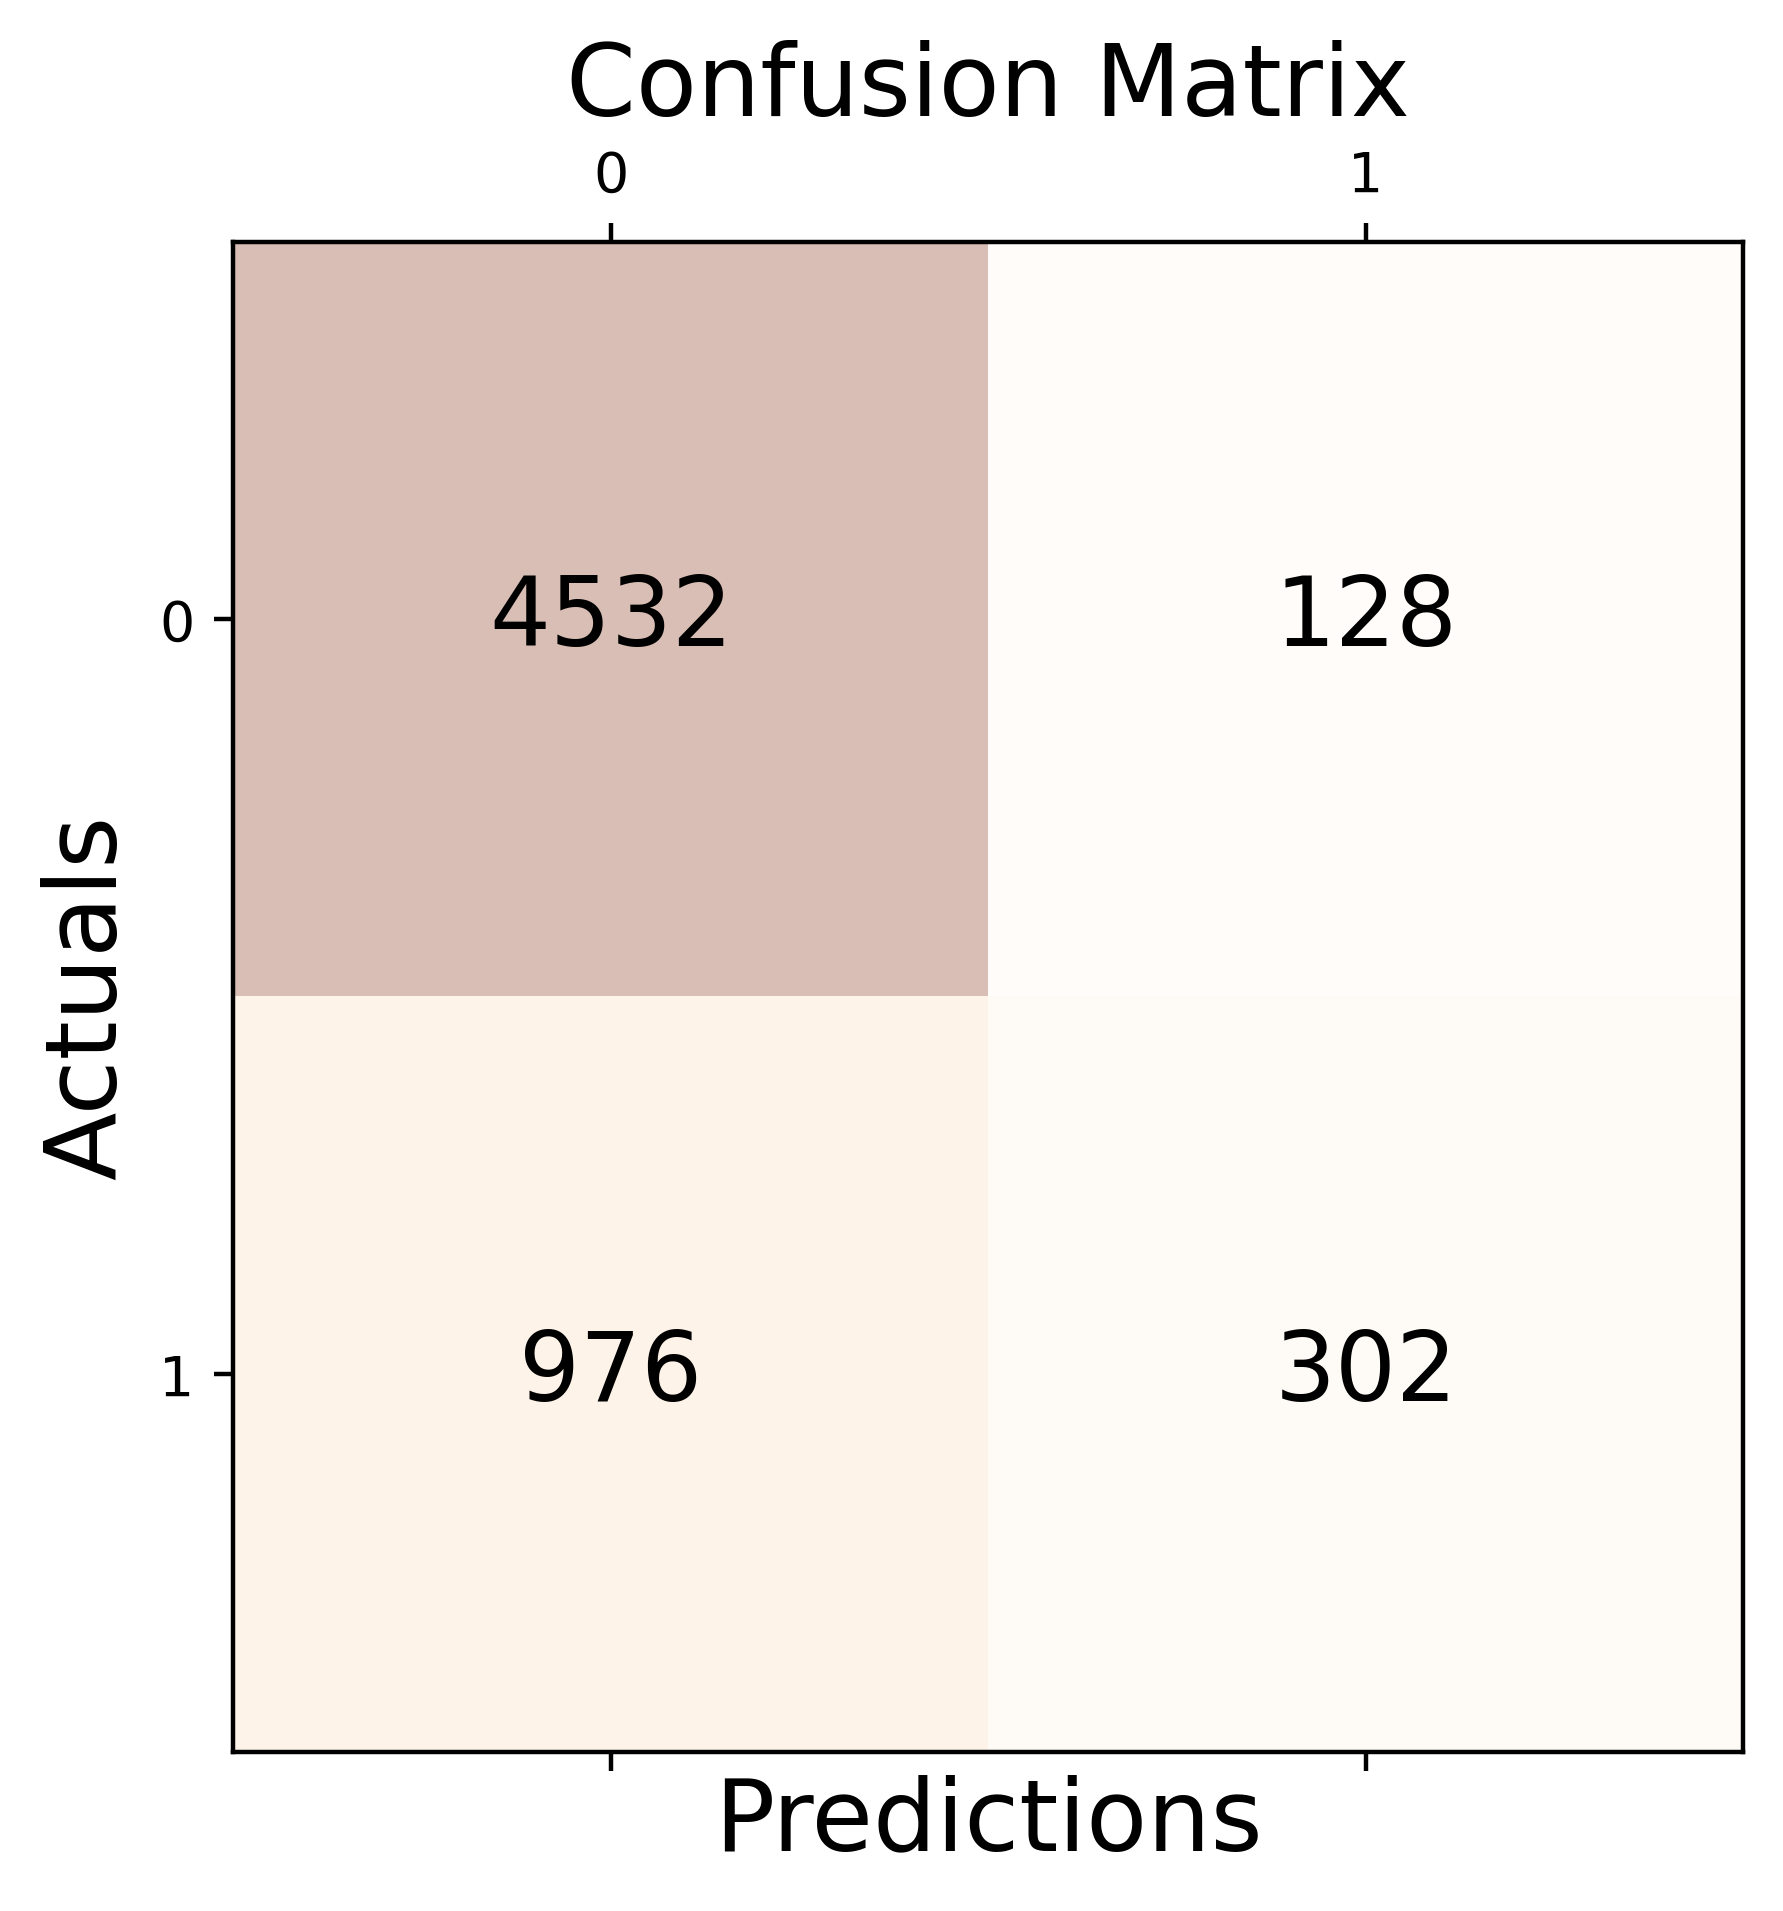

In [29]:
# Plotting the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()